# Exercise 3: Measures of Similarity, summary statistics and probabilities

Objective:The  overall  objective  is  to  get  a  basic  understanding  for  measures  ofsimilarity as well as summary statistics.  Upon completing this exercise it is expected that you:


•Understand thebag of wordsrepresentation for text documents including fil-tering methods based on removal of stop words and stemming.

•Understand how to calculate summary statistics such as mean, variance, me-dian, range, covariance and correlation.

•Understand  the  various  measures  of  similarity  such  as  Jaccard  and  Cosinesimilarity and apply similarity measures to query for similar observations.

### 3.1 The document-term matrix

Document 1:    The Google matrix P is a model of the internet.

Document 2:Pij is nonzero if there is a link from webpage i to j.

Document 3:    The Google matrix is used to rank all Web pages.

Document 4:    The ranking is done by solving a matrix eigenvalue problem.

Document 5:    England dropped out of the top 10 in the FIFA ranking

#### 3.1.1 Propose a suitable bag of words representation

In [ ]:
import pandas as pd

# Definieren der Schlüsselwörter (Spaltennamen)
keywords = ['Google', 'matrix', 'ranking', 'link', 'webpage', 'eigenvalue', 'England', 'FIFA', 'problem', 'nonzero']

# Erstellen der Daten für die Dokument-Term-Matrix
data = [
    [1, 1, 0, 0, 0, 0, 0, 0, 0, 0],  # Document 1
    [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],  # Document 2
    [1, 1, 0, 0, 1, 0, 0, 0, 0, 0],  # Document 3
    [0, 1, 1, 0, 0, 1, 0, 0, 1, 0],  # Document 4
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 0]   # Document 5
]

# Erstellen des DataFrames
df = pd.DataFrame(data, columns=keywords, index=[f'Document {i}' for i in range(1, 6)])

# Anzeige der Dokument-Term-Matrix
df

#### 3.1.2 sklearn bag of words

In [ ]:
# exercise 3.1.4
import importlib_resources
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

filename = importlib_resources.files("dtuimldmtools").joinpath("data/textDocs.txt")
# Load the textDocs.txt as a long string into raw_file:
with open(filename, "r") as f:
    raw_file = f.read()
# raw_file contains sentences seperated by newline characters,
# so we split by '\n':
corpus = raw_file.split("\n")
# corpus is now list of "documents" (sentences), but some of them are empty,
# because textDocs.txt has a lot of empty lines, we filter/remove them:
corpus = list(filter(None, corpus))

# Display the result
print("Document-term matrix analysis")
print()
print("Corpus (5 documents/sentences):")
print(np.asmatrix(corpus))
print()


# To automatically obtain the bag of words representation, we use sklearn's
# feature_extraction.text module, which has a function CountVectorizer.
# We make a CounterVectorizer:
vectorizer = CountVectorizer(token_pattern=r"\b[^\d\W]+\b")
# The token pattern is a regular expression (marked by the r), which ensures
# that the vectorizer ignores digit/non-word tokens - in this case, it ensures
# the 10 in the last document is not recognized as a token. It's not important
# that you should understand it the regexp.

# The object vectorizer can now be used to first 'fit' the vectorizer to the
# corpus, and the subsequently transform the data. We start by fitting:
vectorizer.fit(corpus)
# The vectorizer has now determined the unique terms (or tokens) in the corpus
# and we can extract them using:
attributeNames = vectorizer.get_feature_names_out()
print("Found terms:")
print(attributeNames)
print()

# The next step is to count how many times each term is found in each document,
# which we do using the transform function:
X = vectorizer.transform(corpus)
N, M = X.shape
print("Number of documents (data objects, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)
print()
print("Document-term matrix:")
print(X.toarray())
print()
print("Ran Exercise 3.1.2")

#### 3.1.3 Remove stop words

In [ ]:
# exercise 3.1.4
import importlib_resources
from sklearn.feature_extraction.text import CountVectorizer

filename_docs = importlib_resources.files("dtuimldmtools").joinpath("data/textDocs.txt")
filename_stop = importlib_resources.files("dtuimldmtools").joinpath("data/stopWords.txt")

# As before, load the corpus and preprocess:
with open(filename_docs, "r") as f:
    raw_file = f.read()
corpus = raw_file.split("\n")
corpus = list(filter(None, corpus))

# Load and process the stop words in a similar manner:
with open(filename_stop, "r") as f:
    raw_file = f.read()
stopwords = raw_file.split("\n")

# When making the CountVectorizer, we now input the stop words:
vectorizer = CountVectorizer(token_pattern=r"\b[^\d\W]+\b", stop_words=stopwords)
# Determine the terms in the corpus
vectorizer.fit(corpus)
# ... and count the frequency of each term within a document:
X = vectorizer.transform(corpus)
attributeNames = vectorizer.get_feature_names_out()
N, M = X.shape

# Display the result
print("Document-term matrix analysis (using stop words)")
print()
print("Number of documents (data objects, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)
print()
print("Found terms (no stop words):")
print(attributeNames)
print()
print("Document-term matrix:")
print(X.toarray())
print()
print("Ran Exercise 3.1.3")

#### 3.1.4 Stemming

In [ ]:
# exercise 3.1.4
import importlib_resources

# We'll use a widely used stemmer based:
# Porter, M. “An algorithm for suffix stripping.” Program 14.3 (1980): 130-137.
# The stemmer is implemented in the most used natural language processing
# package in Python, "Natural Langauge Toolkit" (NLTK):
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

filename_docs = importlib_resources.files("dtuimldmtools").joinpath("data/textDocs.txt")
filename_stop = importlib_resources.files("dtuimldmtools").joinpath("data/stopWords.txt")

# As before, load the corpus and preprocess:
with open(filename_docs, "r") as f:
    raw_file = f.read()
corpus = raw_file.split("\n")
corpus = list(filter(None, corpus))

# Load and process the stop words in a similar manner:
with open(filename_stop, "r") as f:
    raw_file = f.read()
stopwords = raw_file.split("\n")


# To enable stemming when using the sklearn-module, we need to parse an
# "analyzer" to the vectorizer we've been using.
# First, we make an object based on the PorterStemmer class, and we also make
# an analyzer object:
stemmer = PorterStemmer()
analyzer = CountVectorizer(
    token_pattern=r"\b[^\d\W]+\b", stop_words=stopwords
).build_analyzer()


# Using these we'll make a function that can stem words:
def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))


# ... and finally, we make a vectorizer just like we've done before:
vectorizer = CountVectorizer(analyzer=stemmed_words)

# Determine the terms:
vectorizer.fit(corpus)
attributeNames = vectorizer.get_feature_names_out()

# ... and count the occurences:
X = vectorizer.transform(corpus)
N, M = X.shape
X = X.toarray()

# Display the result
print("Document-term matrix analysis (using stop words and stemming)")
print()
print("Number of documents (data objects, N):\t %i" % N)
print("Number of terms (attributes, M):\t %i" % M)
print()
print("Found terms (no stop words, stemmed):")
print(attributeNames)
print()
print("Document-term matrix:")
print(X)
print()
print("Ran Exercise 3.1.4")
print()

#### 3.1.5 Measure of similarity: cosine distance

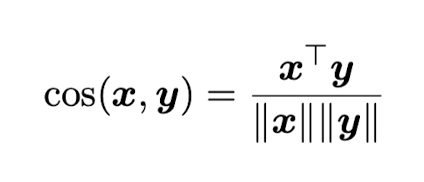

In [ ]:
# exercise 3.1.5
import numpy as np
import scipy.linalg as linalg
from ex3_1_4 import *

from dtuimldmtools import similarity

# Query vector
q = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0])
# notice, that you could get the query vector using the vectorizer, too:
# q = vectorizer.transform(['matrix rank solv'])
# q = np.asarray(q.toarray())
# or use any other string:
# q = vectorizer.transform(['Can I Google how to fix my problem?'])
# q = np.asarray(q.toarray())

# Method 1 ('for' loop - slow)
N = np.shape(X)[0]
# get the number of data objects
sim = np.zeros((N, 1))  # allocate a vector for the similarity
for i in range(N):
    x = X[i, :]  # Get the i'th data object (here: document)
    sim[i] = q / linalg.norm(q) @ x.T / linalg.norm(x)  # Compute cosine similarity

# Method 2 (one line of code with no iterations - faster)
sim = (q @ X.T).T / (
    np.sqrt(np.power(X, 2).sum(axis=1)) * np.sqrt(np.power(q, 2).sum())
)

# Method 3 (use the "similarity" function)
sim = similarity(X, q, "cos")


# Display the result
print("Query vector:\n {0}\n".format(q))
print("Similarity results:\n {0}".format(sim))

print("Ran Exercise 3.1.5")


#### 3.1.6 More info on Natural Language Processing

https://www.nltk.org/book/

### 3.2 Summary Statistics

#### 3.2.1 Mean, Standard deviation, median, range

In [ ]:
# exercise 3.2.1
import numpy as np

x = np.array([-0.68, -2.11, 2.39, 0.26, 1.46, 1.33, 1.03, -0.41, -0.33, 0.47])

# Compute values
mean_x = x.mean()
std_x = x.std(ddof=1)
median_x = np.median(x)
range_x = x.max() - x.min()

# Display results
print("Vector:", x)
print("Mean:", mean_x)
print("Standard Deviation:", std_x)
print("Median:", median_x)
print("Range:", range_x)

print("Ran Exercise 3.2.1")


### 3.3 Measures of similarity

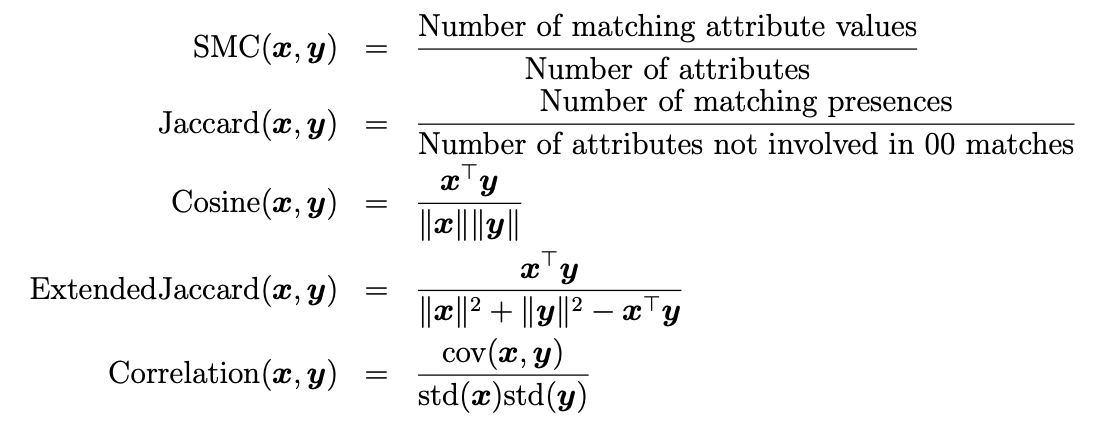

#### 3.3.1 Load data set and calculate first similarity

In [ ]:
# exercise 3.3.1

import importlib_resources
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import loadmat

from dtuimldmtools import similarity

filename = importlib_resources.files("dtuimldmtools").joinpath("data/digits.mat")
# Image to use as query
i = 1

# Similarity: 'SMC', 'Jaccard', 'ExtendedJaccard', 'Cosine', 'Correlation'
similarity_measure = "Correlation"

# Load the digits
# Load Matlab data file to python dict structure
X = loadmat(filename)["X"]
# You can also try the CBCL faces dataset (remember to change 'transpose')
#X = loadmat('../Data/wildfaces_grayscale.mat')['X']
N, M = X.shape
transpose = False # should the plotted images be transposed? 


# Search the face database for similar faces 
# Index of all other images than i
noti = list(range(0,i)) + list(range(i+1,N)) 
# Compute similarity between image i and all others
sim = similarity(X[i,:], X[noti,:], similarity_measure)
sim = sim.tolist()[0]
# Tuples of sorted similarities and their indices
sim_to_index = sorted(zip(sim,noti))


# Visualize query image and 5 most/least similar images
plt.figure(figsize=(12,8))
plt.subplot(3,1,1)

img_hw = int(np.sqrt(len(X[0])))
img = np.reshape(X[i], (img_hw,img_hw))
if transpose: img = img.T
plt.imshow(img, cmap=plt.cm.gray)
plt.xticks([]); plt.yticks([])
plt.title('Query image')
plt.ylabel('image #{0}'.format(i))


for ms in range(5):

    # 5 most similar images found
    plt.subplot(3,5,6+ms)
    im_id = sim_to_index[-ms-1][1]
    im_sim = sim_to_index[-ms-1][0]
    img = np.reshape(X[im_id],(img_hw,img_hw))
    if transpose: img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Most similar images')

    # 5 least similar images found
    plt.subplot(3,5,11+ms)
    im_id = sim_to_index[ms][1]
    im_sim = sim_to_index[ms][0]
    img = np.reshape(X[im_id],(img_hw,img_hw))
    if transpose: img = img.T
    plt.imshow(img, cmap=plt.cm.gray)
    plt.xlabel('sim={0:.3f}'.format(im_sim))
    plt.ylabel('image #{0}'.format(im_id))
    plt.xticks([]); plt.yticks([])
    if ms==2: plt.title('Least similar images')
    
plt.show()

print('Ran Exercise 3.3.1')

#### 3.3.2 Impact of Scaling and Translation to similarity measures

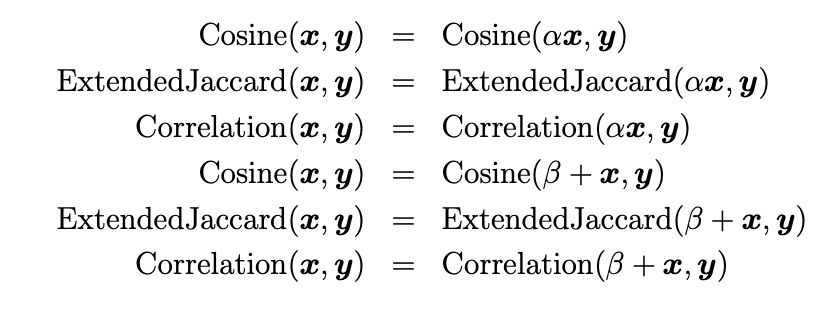

In [ ]:
# exercise 3.2.2

import numpy as np

from dtuimldmtools import similarity

# Generate two data objects with M random attributes
M = 5
x = np.random.rand(1, M)
y = np.random.rand(1, M)

# Two constants
a = 1.5
b = 1.5

# Check the statements in the exercise
print(
    "Cosine scaling: %.4f "
    % (similarity(x, y, "cos") - similarity(a * x, y, "cos"))[0, 0]
)
print(
    "ExtendedJaccard scaling: %.4f "
    % (similarity(x, y, "ext") - similarity(a * x, y, "ext"))[0, 0]
)
print(
    "Correlation scaling: %.4f "
    % (similarity(x, y, "cor") - similarity(a * x, y, "cor"))[0, 0]
)
print(
    "Cosine translation: %.4f "
    % (similarity(x, y, "cos") - similarity(b + x, y, "cos"))[0, 0]
)
print(
    "ExtendedJaccard translation: %.4f "
    % (similarity(x, y, "ext") - similarity(b + x, y, "ext"))[0, 0]
)
print(
    "Correlation translation: %.4f "
    % (similarity(x, y, "cor") - similarity(b + x, y, "cor"))[0, 0]
)

print("Ran Exercise 3.2.2")


##### Solutions: (1) Cosine Scaling, (3) Correlation Scaling, (6) Correlation Translation statements are correct